# Fit different distribution

- Ensure that the generated table conforms to the limitation limitations of sample and feature

## 多峰/周期

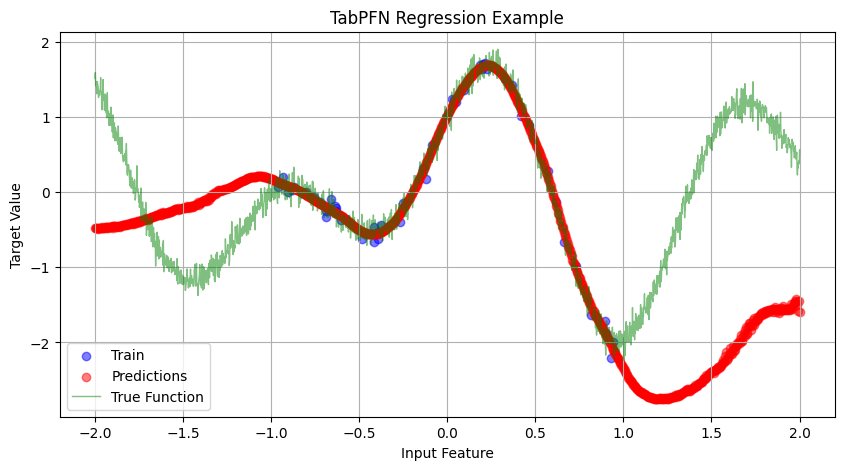

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabpfn import TabPFNRegressor
import torch
plt.style.use("default")


# Generate synthetic data
def Multimodal(x):
    return np.sin(5 * x[:, 0]) + np.cos(3 * x[:, 0]) + np.random.normal(0, 0.1, x.shape[0])


np.random.seed(42)
x_truth = np.linspace(-2, 2, 2000).reshape(-1, 1)  # shape: (1000, 1)
x_train = np.random.uniform(-1, 1, size=(50, 1))  # shape: (100, 1)
y_train = Multimodal(x_train)  # y.shape = (100,)

x_dense = np.linspace(-2, 2, 1000).reshape(-1, 1)
mask = ~np.isin(np.round(x_dense, 3), np.round(x_train, 3))
x_query = x_dense[mask[:, 0]]

reg = TabPFNRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_query)

# # Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Train', alpha=0.5)
plt.scatter(x_query, y_pred, color='red', label='Predictions', alpha=0.5)
plt.plot(x_truth, Multimodal(x_truth), color='green', label='True Function', linewidth=1, alpha=0.5)
plt.title('TabPFN Regression Example')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid()
plt.show()

- 特征分布范围内泛化很好，但是无法做到分布之外的外推

## Drifting trend

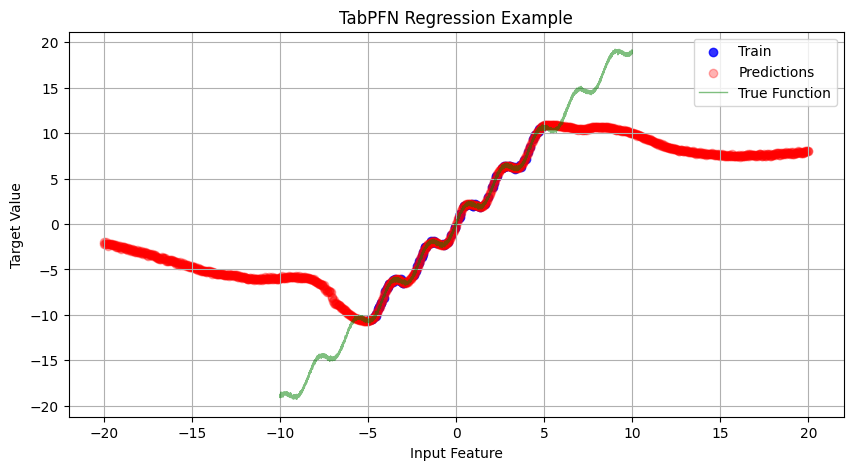

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabpfn import TabPFNRegressor
import torch
plt.style.use("default")


# Generate synthetic data
def drifting_trend(x):
    return (x[:, 0] * 2) + np.sin(3 * x[:, 0]) + np.random.normal(0, 0.1, size=x.shape[0])

np.random.seed(42)
x_truth = np.linspace(-10, 10, 10000).reshape(-1, 1)  # shape: (1000, 1)
x_train = np.random.uniform(-5, 5, size=(100, 1))  # shape: (100, 1)
y_train = drifting_trend(x_train)  # y.shape = (100,)

x_dense = np.linspace(-20, 20, 1000).reshape(-1, 1)
mask = ~np.isin(np.round(x_dense, 3), np.round(x_train, 3))
x_query = x_dense[mask[:, 0]]

reg = TabPFNRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_query)

# # Plotting the results
plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, color='blue', label='Train', alpha=0.8)
plt.scatter(x_query, y_pred, color='red', label='Predictions', alpha=0.3)
plt.plot(x_truth, drifting_trend(x_truth), color='green', label='True Function', linewidth=1, alpha=0.5)
plt.title('TabPFN Regression Example')
plt.xlabel('Input Feature')
plt.ylabel('Target Value')
plt.legend()
plt.grid()
plt.show()

## 三模态Gaussian

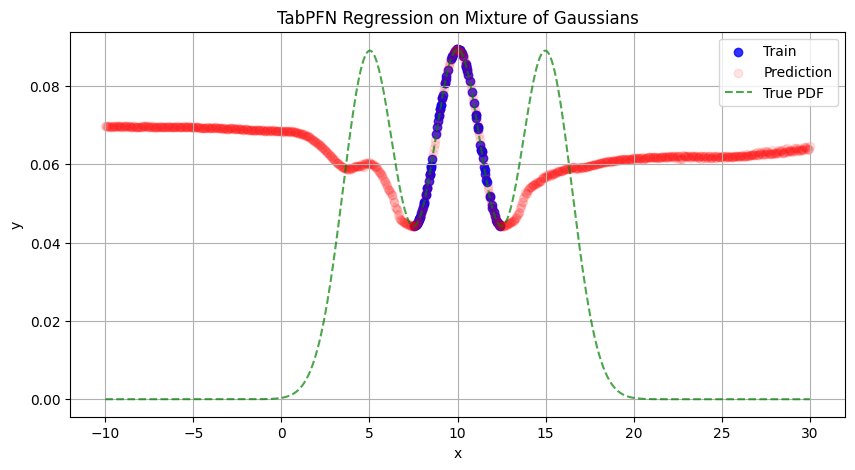

In [42]:
# 三模态高斯混合分布 + TabPFN 回归测试
import numpy as np
import matplotlib.pyplot as plt
from tabpfn import TabPFNRegressor

plt.style.use("default")

means = [5, 10, 15]
stds = [1.5, 1.5, 1.5]
weights = [1/3, 1/3, 1/3]

def mixture_density(x):
    y = np.zeros_like(x)
    for mean, std, weight in zip(means, stds, weights):
        y += weight * (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    return y

np.random.seed(42)
x_train = np.random.uniform(7.5, 12.5, size=(100, 1))
y_train = mixture_density(x_train.flatten())

x_dense = np.linspace(-10, 30, 1000).reshape(-1, 1)
mask = ~np.isin(np.round(x_dense, 3), np.round(x_train, 3))
x_query = x_dense[mask[:, 0]]

reg = TabPFNRegressor()
reg.fit(x_train, y_train)
y_pred = reg.predict(x_query)


plt.figure(figsize=(10, 5))
plt.scatter(x_train, y_train, label="Train", color="blue", alpha=0.8)
plt.scatter(x_query, y_pred, label="Prediction", color="red", alpha=0.1)
y_truth_density = mixture_density(x_query.flatten()) 
plt.plot(x_query, y_truth_density, label="True PDF", color="green", linestyle="--", alpha=0.7)

plt.title("TabPFN Regression on Mixture of Gaussians")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

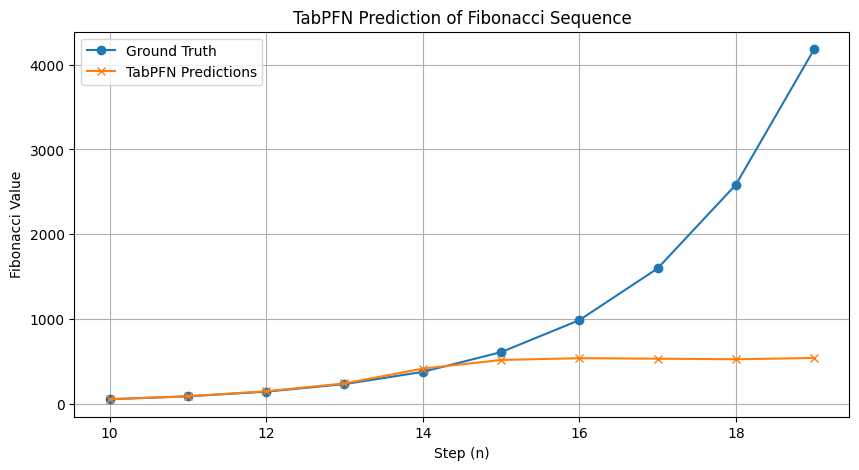

Step 10: True=55, Predicted=55.20, Error=0.20
Step 11: True=89, Predicted=89.95, Error=0.95
Step 12: True=144, Predicted=148.77, Error=4.77
Step 13: True=233, Predicted=241.49, Error=8.49
Step 14: True=377, Predicted=415.67, Error=38.67
Step 15: True=610, Predicted=517.79, Error=92.21
Step 16: True=987, Predicted=538.76, Error=448.24
Step 17: True=1597, Predicted=532.77, Error=1064.23
Step 18: True=2584, Predicted=526.04, Error=2057.96
Step 19: True=4181, Predicted=541.38, Error=3639.62


In [34]:
import numpy as np
import matplotlib.pyplot as plt
from tabpfn import TabPFNRegressor

# Step 1: 构造 Fibonacci 数列
def generate_fibonacci(n):
    seq = [0, 1]
    for _ in range(n - 2):
        seq.append(seq[-1] + seq[-2])
    return np.array(seq)

# 构造训练数据
fib = generate_fibonacci(20)  # 先生成 20 个
X_train = np.column_stack((fib[:-2], fib[1:-1]))  # x1 = F_n, x2 = F_{n+1}
y_train = fib[2:]

# Step 2: 训练模型
reg = TabPFNRegressor()
reg.fit(X_train[:10], y_train[:10])  # 只用前10组训练

# Step 3: 预测下一个数
X_queries = np.column_stack((fib[8:18], fib[9:19]))  # 从 F_8, F_9 开始滑动预测
true_ys = fib[10:20]

# 模型预测
y_preds = reg.predict(X_queries)

# Step 4: 可视化结果
plt.figure(figsize=(10, 5))
plt.plot(range(10, 20), true_ys, label='Ground Truth', marker='o')
plt.plot(range(10, 20), y_preds, label='TabPFN Predictions', marker='x')
plt.title('TabPFN Prediction of Fibonacci Sequence')
plt.xlabel('Step (n)')
plt.ylabel('Fibonacci Value')
plt.legend()
plt.grid()
plt.show()

# 打印误差
for i, (gt, pred) in enumerate(zip(true_ys, y_preds)):
    print(f"Step {10+i}: True={gt}, Predicted={pred:.2f}, Error={abs(gt - pred):.2f}")

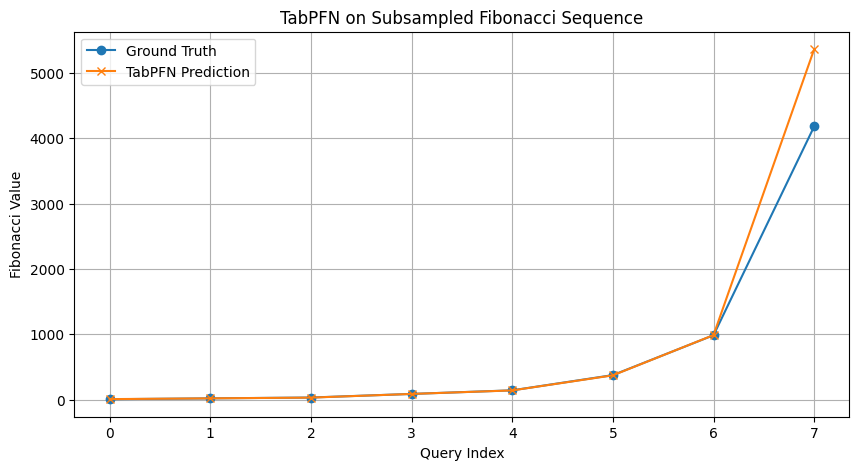

Query 0: True=8, Predicted=9.66, Error=1.66
Query 1: True=21, Predicted=21.34, Error=0.34
Query 2: True=34, Predicted=32.52, Error=1.48
Query 3: True=89, Predicted=88.90, Error=0.10
Query 4: True=144, Predicted=142.77, Error=1.23
Query 5: True=377, Predicted=373.27, Error=3.73
Query 6: True=987, Predicted=989.02, Error=2.02
Query 7: True=4181, Predicted=5362.22, Error=1181.22


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from tabpfn import TabPFNRegressor

# Step 1: 构造 Fibonacci 序列（前 20 项）
def generate_fibonacci(n):
    seq = [0, 1]
    for _ in range(n - 2):
        seq.append(seq[-1] + seq[-2])
    return np.array(seq)

fib = generate_fibonacci(20)  # 得到 F_0 到 F_19

# 构造样本 (X = [F_n, F_{n+1}], y = F_{n+2})，总共 18 个样本
X_all = np.column_stack((fib[:-2], fib[1:-1]))  # shape (18, 2)
y_all = fib[2:]  # shape (18,)

# Step 2: 从中随机抽取 10 个作为训练，其余作为测试
np.random.seed(42)
all_indices = np.arange(len(X_all))
train_indices = np.random.choice(all_indices, size=10, replace=False)
test_indices = np.setdiff1d(all_indices, train_indices)

X_train = X_all[train_indices]
y_train = y_all[train_indices]
X_query = X_all[test_indices]
y_true = y_all[test_indices]

# Step 3: 拟合 TabPFN 模型
reg = TabPFNRegressor()
reg.fit(X_train, y_train)

# Step 4: 模型预测
y_pred = reg.predict(X_query)

# Step 5: 可视化
plt.figure(figsize=(10, 5))
plt.plot(range(len(y_true)), y_true, label='Ground Truth', marker='o')
plt.plot(range(len(y_pred)), y_pred, label='TabPFN Prediction', marker='x')
plt.title('TabPFN on Subsampled Fibonacci Sequence')
plt.xlabel('Query Index')
plt.ylabel('Fibonacci Value')
plt.legend()
plt.grid()
plt.show()

# Step 6: 打印误差
for i, (gt, pred) in enumerate(zip(y_true, y_pred)):
    print(f"Query {i}: True={gt}, Predicted={pred:.2f}, Error={abs(gt - pred):.2f}")